# Predicting Heart Disease using machine learning

This notebook looks into using various python-based machine learning and data science libraries to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

Approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation 



## 1. Problem Definition

* Given clinical paramaters about a patient, can we predict whether or not they have heart disease


## 2. Data

* Original data came from Cleaveland data from UCI Machine learning repositiory
* There is also a version of it available on kaggle.

## 3. Evaluation

* If We can reach 95% accuracy at predicting whether or not a patient has heart disease during proof of concept, we will persue the project


## 4. Features

This is where you will get information about each of the features in your data

** Create Data Dictionary **

Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (target) (the predicted attribute) (1 = yes , 0 = no)

# Preparing the tools

We are going to use pandas, Matplotlib and NumPy for data analysis and manipulation



In [66]:
# import all the tools we need

# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [67]:
# Load data
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration

Goal here is to find out more about the data and become a subject matter expert on the data set we are working with

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. Whats missing from the data and how do you deal with it
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of the data

In [68]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [69]:
df.tail(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [70]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

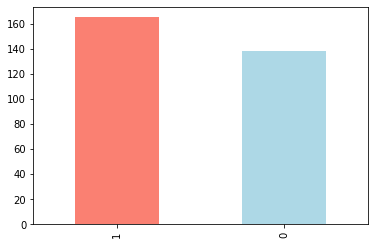

In [71]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [73]:
df.isna().sum() # Are there any missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease frequency accoring to Sex

In [74]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [75]:
# Compare target with sex column
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


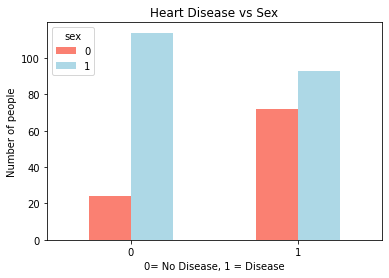

In [76]:
 # Create a plot of crosstab
 pd.crosstab(df["target"],df["sex"]).plot(kind="bar",color=["salmon","lightblue"])
 plt.title("Heart Disease vs Sex")
 plt.xlabel("0= No Disease, 1 = Disease")
 plt.ylabel("Number of people")
 plt.xticks(rotation=0)
 plt.show()

In [77]:
df["thalach"].value_counts() # Many differnt values

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs Heart rate for Heart disease


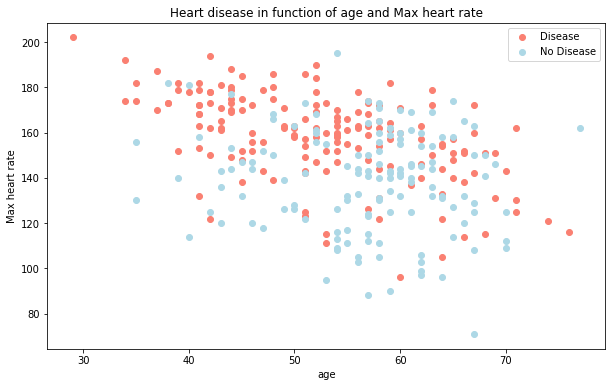

In [78]:
# create another figure
plt.figure(figsize=(10,6))

# scatter positive
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color=["salmon"],label="Disease")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color=["lightblue"],label="No Disease");

# add some helpful info
plt.title("Heart disease in function of age and Max heart rate")
plt.xlabel("age")
plt.ylabel("Max heart rate")
plt.legend()
plt.show()

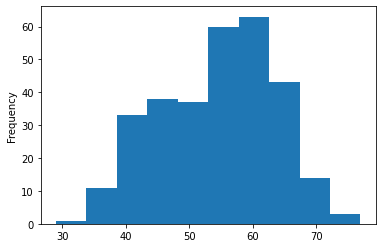

In [79]:
# Check distribution of age column with histogram
df.age.plot.hist();

### Heart disease frequency per chest pain type

In [80]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

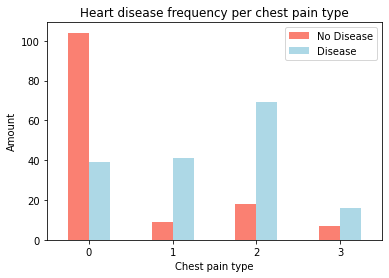

In [81]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",color=["salmon","lightblue"])

plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

In [82]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


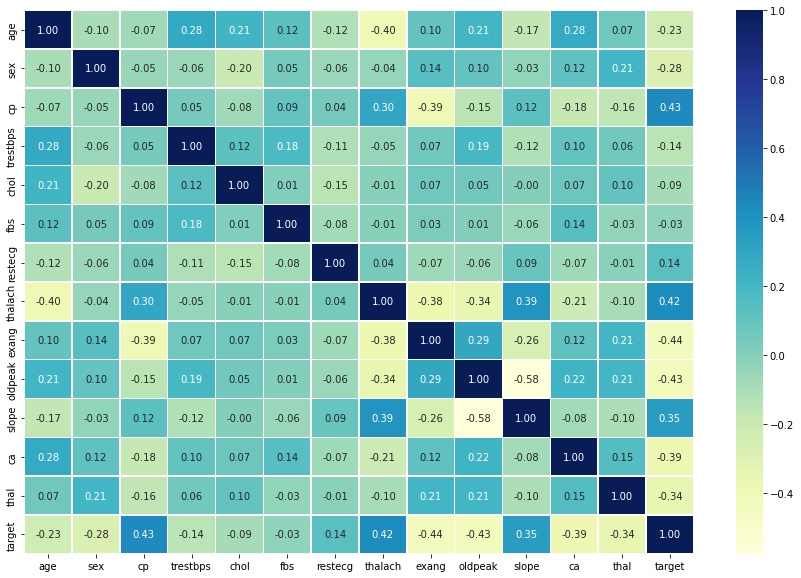

In [83]:
# Lets make our corelation matrix a little prittier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

## 5.0 Modelling

In [84]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
# split data into X and y
X = df.drop("target",axis=1)
y=df["target"]


In [89]:
# set random seed
np.random.seed(42)

# Split data into training and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

len(X_train),len(X_test),len(df)

(242, 61, 303)

We are going to try 3 ML models:
* Logistic LogisticRegression
* K-nearest nearest
* Random forest classifier

In [91]:
# put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
  """
  Fits and evaluates given machine learning models
  models: A dict of different Scikit-learn ML models
  X_train: Training data no labels
  X_test: Test data no labels
  y_train: train labels
  y_test: test labels
  """
  # Set random seed
  np.random.seed(42)
  # Make dictionary to keep score
  model_scores = {}
  #loop through models
  for name,model in models.items():
    # fit model to data
    model.fit(X_train,y_train)
    # Evaluate model and append its score to model_scores
    model_scores[name] = model.score(X_test,y_test)
  return model_scores

In [94]:
model_scores = fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

## Model comparison

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

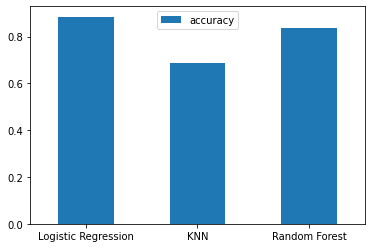

In [98]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot(kind="bar")
plt.xticks(rotation=0)

Lets look at:
* Hyperparamater tuning
* feature importance
* confusion matrix
* cross-validation
*Precision
* recall
* f1 score
* classification repot
* ROC curve
* AUC area under the curve

# Hyper paramter tuning

In [111]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


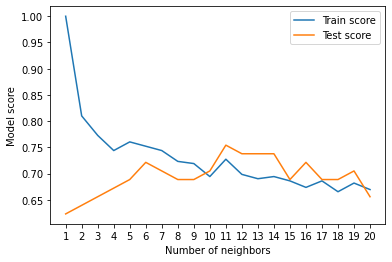

In [114]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# Hyper paramater tuning RandomizedSearchCV

we will tune:
* logistic regression
* random forest classifier

using RandomizedSearchCV

In [128]:
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}

# Create hyperparamter grid for RandomForesClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
        "max_depth": [None, 3,5,10],
        "min_samples_split": np.arange(2,20,2),
        "min_samples_leaf": np.arange(1,20,2)}

In [122]:
# Tune logisticregression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [123]:
rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [125]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Train RandomForestClassifier()

In [129]:
# Tune RandomForesClassifier

np.random.seed(42)

# Setup random hyperparameter search for RandomForesClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for RandomForesClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [131]:
rs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 19,
 'min_samples_split': 4,
 'n_estimators': 210}

In [133]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [134]:
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

Lets try GridSearchCV for brute force best params to increase score

In [138]:
# Tune logisticregression
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver": ["liblinear"]}

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [139]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [142]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy
* ROC Curve and AUC score
* Confusion matrix
* classification report
* precision
* recall
* f1 score

## ROC Curve and AUC Metric

In [158]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [159]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


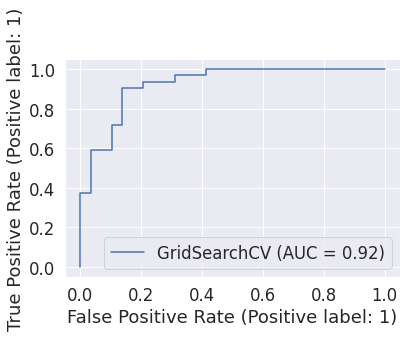

In [156]:
# Plot ROC curve and calculate the AUC metric
plot_roc_curve(gs_log_reg,X_test,y_test)

## Confusion Matrix

In [160]:
print(confusion_matrix(y_test,y_preds))


[[25  4]
 [ 3 29]]


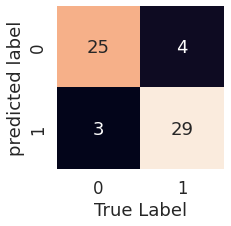

In [161]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
  """
  Plots a confusion matrix using Seaborns heatmap
  """
  fig,ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
  plt.xlabel("True Label")
  plt.ylabel("predicted label")

plot_conf_mat(y_test,y_preds)

## Classification Report

In [163]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross validation

In [174]:
# Check best hyper Paramaters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [175]:
# Create new classifier with best params
clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")


In [176]:
# Cross validation accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy") 
cv_acc = cv_acc.mean()

In [177]:
# Cross validated Precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision") 
cv_precision = cv_precision.mean()

In [178]:
# Cross validated recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall") 
cv_recall = cv_recall.mean()

In [179]:
# Cross validated f1
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1") 
cv_f1 = cv_f1.mean()

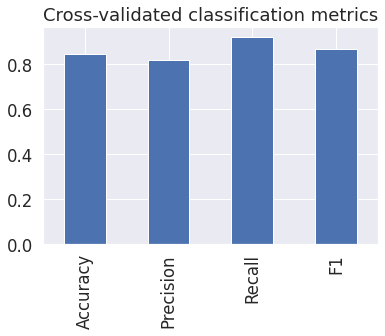

In [180]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature importance

another way of asking "which features contributed most to outcomes of model and how did they contributes"

Finding feature importance is different for each machine learning model
Finding feature importance for logisticRgression model

In [181]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [182]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [184]:
# Check coef_
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [191]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'ca': -0.6373332766360461,
 'chol': -0.0016649614843449207,
 'cp': 0.660014324982524,
 'exang': -0.604701713592625,
 'fbs': 0.040172360271308105,
 'oldpeak': -0.5679545646616215,
 'restecg': 0.31603405294617176,
 'sex': -0.8606204883695241,
 'slope': 0.4508539209693025,
 'thal': -0.6755509369619848,
 'thalach': 0.02458922341328129,
 'trestbps': -0.01155970600550047}

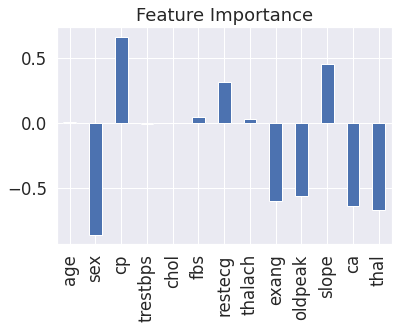

In [200]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",title="Feature Importance",legend=False);